In [1]:
#Question 1 :An airline tracks flight delays (in minutes) for 20 flights. Analyze the flight delays to calculate percentiles, detect outliers,
#and evaluate the overall distribution.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50,120, 80, 10, 75, 90, 200, 55, 40, 70, 150]
delays_arr=np.array(delays)
#Percentiles (10th, 25th, 50th, 75th, 90th): 
q10=np.percentile(delays_arr,10)
q1=np.percentile(delays_arr,25)
q2=np.percentile(delays_arr,50)
q3=np.percentile(delays_arr,75)
q90=np.percentile(delays_arr,90).round(2)
print("Percentiles (10th, 25th, 50th, 75th, 90th): ",q10,q1,q2,q3,q90)

Percentiles (10th, 25th, 50th, 75th, 90th):  14.5 28.75 52.5 82.5 123.0


In [3]:
#IQR
IQR=q3-q1
print("IQR",IQR)

IQR 53.75


In [4]:
#outliers:
low_bound=q1-(1.5*IQR)
upp_bound=q3+(1.5*IQR)
outliers=[x for x in delays_arr if(x<low_bound) or (x>upp_bound)]
print("outliers:",outliers)

outliers: [np.int64(200)]


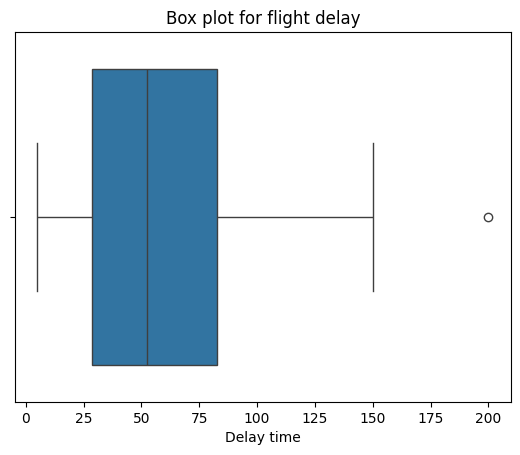

In [5]:
sns.boxplot(x=delays_arr)
plt.xlabel("Delay time")
plt.title("Box plot for flight delay")
plt.show()

In [22]:
#Question 2 :A company wants to analyze the salary distribution of its employees to understand the central tendency and determine whether the data is skewed.


In [8]:
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]

mean_sal=np.mean(salaries)
median_sal=np.median(salaries)
mode_sal=stats.mode(salaries)
print("Mean:",mean_sal,' ',"Median:",median_sal,' ',"Mode:",mode_sal[0])

Mean: 56950.0   Median: 57500.0   Mode: 30000


In [9]:
#check skewness
if mean_sal<median_sal:
    print("data is left skew or Negative skew")
elif mean_sal>median_sal:
    print("data is right skew or positive skew")
else:
    print("Data is symmetrical")

#The data is Left Skewed (Negative Skew) becuase mean< median

data is left skew or Negative skew


In [49]:
#Question 3: A school wants to analyze the exam performance of students across three subjects: Mathematics, Science, and English. How can Data Science concepts be applied to understand their performance?


In [53]:
print(sns.__version__)

0.13.2


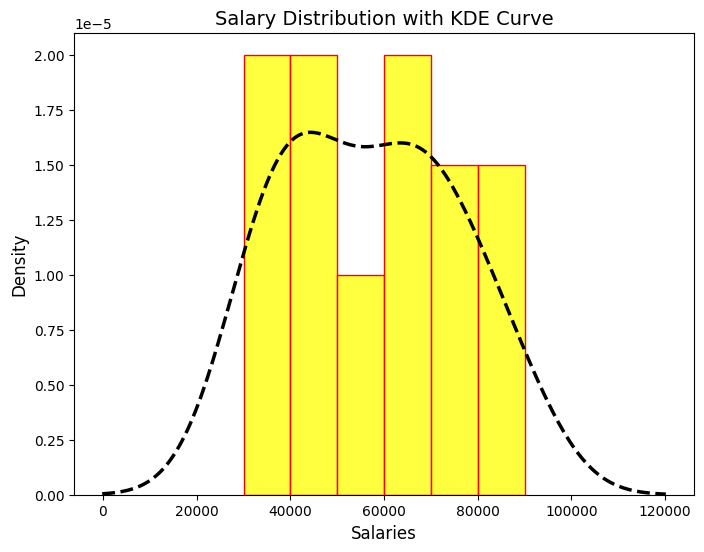

In [10]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram
sns.histplot(
    x=salaries,
    color='yellow',
    edgecolor='red',
    stat='density',
    ax=ax
)

# KDE curve
sns.kdeplot(
    x=salaries,
    color='black',
    linewidth=2.5,
    linestyle='--',
    ax=ax
)

plt.title("Salary Distribution with KDE Curve", fontsize=14)
plt.xlabel("Salaries", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

In [11]:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
df=pd.DataFrame(data)
df
    

,Student,Mathematics,Science,English
0,A,85,80,78
1,B,78,85,74
2,C,92,88,85
3,D,88,70,80
4,E,70,75,68
5,F,95,92,90
6,G,60,55,50
7,H,80,82,77
8,I,90,89,83
9,J,76,78,72


In [13]:
df.describe() #q1.Descriptive statistics

,Mathematics,Science,English
count,10.000000,10.000000,10.000000
mean,81.400000,79.400000,75.700000
std,10.844353,10.895463,11.086027
min,60.000000,55.000000,50.000000
25%,76.500000,75.750000,72.500000
50%,82.500000,81.000000,77.500000
75%,89.500000,87.250000,82.250000
max,95.000000,92.000000,90.000000


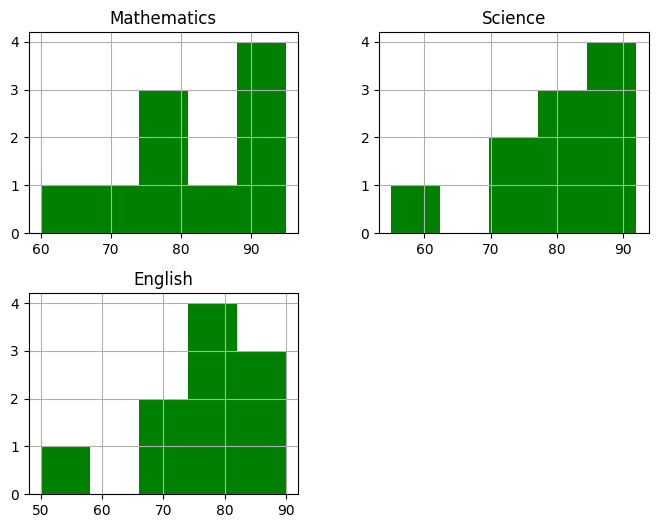

In [24]:
#Histogram
df[['Mathematics','Science','English']].hist(bins=5,figsize=(8,6),color='green')
plt.xlabel('Scores')
plt.title('Histogram for scores')
plt.show()

In [14]:
#correlation
cor_matrix=df[['Mathematics','Science','English']].corr()
print(cor_matrix)

             Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


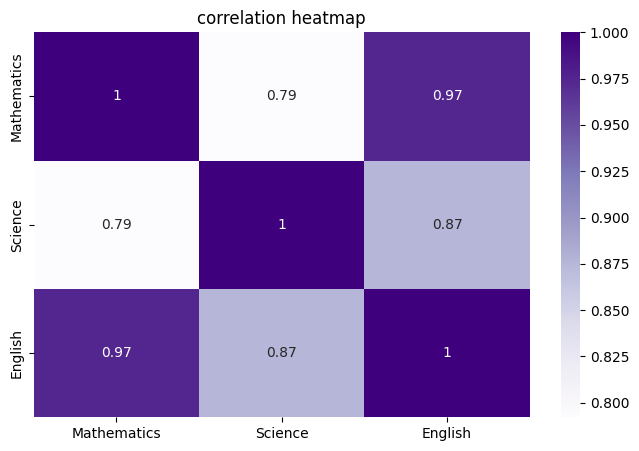

In [23]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cor_matrix,annot=True,cmap='Purples')#annot-display munerical value in cells,Colourmap show color intensity based on values-darker shade for 1
plt.title("correlation heatmap")
plt.show()

In [25]:
#Question 4:A pharmaceutical company conducted a clinical trial with two groups: one receiving medication and the other a placebo. How do you perform a hypothesis test to determine the effectiveness of the medication?


In [27]:
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]
ttest,pval=stats.ttest_ind(medication_group,placebo_group)
print("T-statistic:",ttest)
print(f"P value:{pval:.4f}")

T-statistic: -9.201427649220966
P value:0.0000


In [28]:
threshold=0.05
if pval<threshold:
    print("reject Null hypothesis-The medicine is effective")
else:
    print("Accept null hypothesis-The medicine is not working")

reject Null hypothesis-The medicine is effective


In [29]:
#Question 5 : A company conducted a customer satisfaction survey where customers rated their experience on a scale of 1 to 10. Analyze the survey results to calculate descriptive statistics and visualize the distribution of customer satisfaction ratings.

In [31]:
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
#descriptive statistics
mean=np.mean(ratings)
median=np.median(ratings)
mode=stats.mode(ratings)
std=np.std(ratings)
print("Mean:",mean)
print("median:",median)
print("mode:",mode[0])
print("Standard Deviation",std)

Mean: 7.5
median: 7.5
mode: 7
Standard Deviation 1.746424919657298


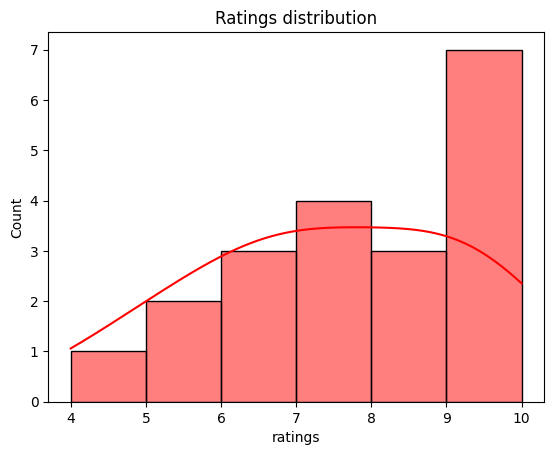

In [38]:
sns.histplot(ratings,color='red',kde=True)
plt.xlabel("ratings")
plt.title("Ratings distribution")
plt.show()